In [10]:
import tifffile as tiff
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
img = tiff.imread(r'input/kaggle/siim-medical/tiff_images/ID_0002_AGE_0074_CONTRAST_1_CT.tif')

In [7]:
print(img.shape, img.dtype)

(512, 512) float64


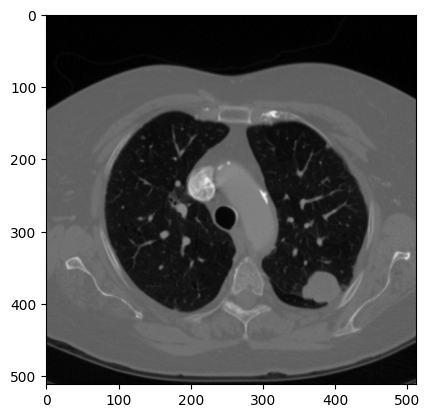

In [9]:
plt.imshow(img, cmap='gray')

In [33]:
df = pd.read_csv(r'input/kaggle/siim-medical/overview.csv')

In [18]:
df.head(65)

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm
...,...,...,...,...,...,...,...,...
60,60,80,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,60,ID_0060_AGE_0080_CONTRAST_0_CT.tif,ID_0060_AGE_0080_CONTRAST_0_CT.dcm
61,61,74,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,61,ID_0061_AGE_0074_CONTRAST_0_CT.tif,ID_0061_AGE_0074_CONTRAST_0_CT.dcm
62,62,67,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,62,ID_0062_AGE_0067_CONTRAST_0_CT.tif,ID_0062_AGE_0067_CONTRAST_0_CT.dcm
63,63,73,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,63,ID_0063_AGE_0073_CONTRAST_0_CT.tif,ID_0063_AGE_0073_CONTRAST_0_CT.dcm


In [32]:
img = tiff.imread(f'input/kaggle/siim-medical/tiff_images/{df.tiff_name[66]}')
print(img.shape, img.dtype)
plt.imshow(img, cmap='gray')

AttributeError: 'DataFrame' object has no attribute 'tiff_name'

In [22]:
df = pd.read_csv('input/kaggle/ct-kidney/kidneyData.csv')

In [23]:
df.head()

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


In [24]:
df.diag.value_counts()

diag
Normal    5077
Cyst      3709
Tumor     2283
Stone     1377
Name: count, dtype: int64

In [25]:
df.path[0]

'/content/data/CT KIDNEY DATASET Normal, CYST, TUMOR and STONE/TUMOR/Tumor- (1044).jpg'

In [26]:
df[["target", "diag"]].value_counts()

target  diag  
1       Normal    5077
0       Cyst      3709
3       Tumor     2283
2       Stone     1377
Name: count, dtype: int64

In [202]:
import tensorflow as tf
kernel = tf.constant([
    [0, -1, 0],
    [-1,  5, -1],
    [0, -1, 0],
])

plt.figure(figsize=(3, 3))

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

(512, 512) float64


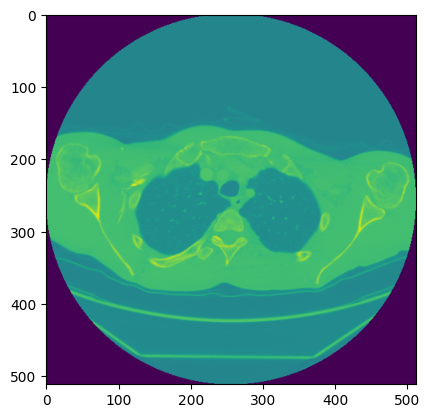

In [203]:
df = pd.read_csv(r'input/kaggle/siim-medical/overview.csv')
img = tiff.imread(f'input/kaggle/siim-medical/tiff_images/{df.tiff_name[8]}')
print(img.shape, img.dtype)
plt.imshow(img)

In [204]:
image = tf.image.convert_image_dtype(img, dtype = tf.float32)

In [205]:
image = tf.expand_dims(tf.expand_dims(image, axis = 0), axis = -1)
print(image.shape, img.dtype)

(1, 512, 512, 1) float64


In [206]:
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])

In [207]:
kernel = tf.cast(kernel, dtype = tf.float32)

In [208]:
image_filter = tf.nn.conv2d(
    input = image,
    filters = kernel,
    strides = 1,
    padding = 'SAME'
)

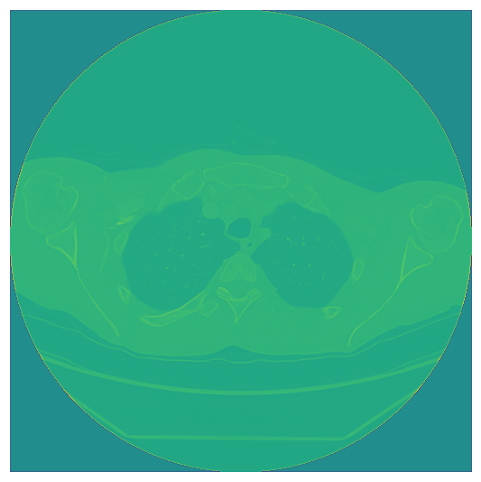

In [209]:
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show()

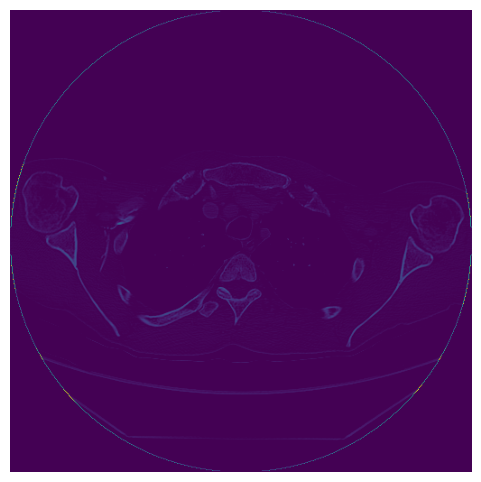

In [210]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show()